In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import umap
import matplotlib.pyplot as plt

In [2]:
import spacy
nlp = spacy.load('pt')


df = pd.read_csv('../dados_categorizados_completo_novo.csv')
df.head()

,Id,Enunciado,Tópico,Contexto
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático


In [3]:
def n_grams(sentence):
    return sentence.split()
master=[]
for elemento in df['Enunciado']:
    doc=nlp(elemento)
    lista=[]
    for token in doc:
        if(token.text not in nlp.Defaults.stop_words and token.lemma_ not in nlp.Defaults.stop_words and token.text.isalpha() and len(token.text)>1):
            lista+=[token.lemma_]
    master+=[lista]

In [4]:
df['tokens']=master

In [5]:
from gensim.models import Word2Vec

In [6]:
model = Word2Vec(min_count=10,
                     window=10,
                     size=20,
                     #sample=6e-5, 
                     #alpha=0.03, 
                     #min_alpha=0.0007, 
                     #negative=20,
                     workers=4,
                     sg=0,
                     hs=1)

In [7]:
model.build_vocab(sentences=df.tokens)
# model.train(df.tokens, total_examples=model.corpus_count, epochs=30, report_delay=1)

In [8]:
# model.save("w2v.model")
# print("Model Saved")

In [9]:
# max_epochs = 100

# for epoch in range(max_epochs):
#     model.train(df.tokens,
#                 total_examples=model.corpus_count,
#                 epochs=model.iter)
#     # decrease the learning rate
#     model.alpha -= 0.0002
#     # fix the learning rate, no decay
#     model.min_alpha = model.alpha

In [10]:
# model.init_sims(replace=True)
# X = model[model.wv.vocab]

In [11]:

# %matplotlib inline

# cluster_embedding = umap.UMAP(n_neighbors=10, min_dist=0.0,
#                               n_components=2, random_state=42).fit_transform(X)

# plt.figure(figsize=(10,9))
# plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [12]:
vocab=[]
words=[]
for i in df.tokens:
    for j in i:
        try:
            vocab.append(model.wv.word_vec(j))
            if(j not in words):
                words+=[j]
        except:
            continue

In [13]:
len(words)
teste=[a*0 for a in range(0,len(words))]


In [14]:
# from numpy import linalg as LA
# vec = []
# vectors = []from numpy import linalg as LA
# vec = []
# for i in df.tokens:
#     for j in i:
#         try:
#             vec.append(model.wv.word_vec(j))
#             for cada in vec:
#                 final.append(LA.norm(cada, -2))
#         except:
#             continue
#     vectors.append(final)
#     vec = []


In [15]:
def procura(palavra,lista):
    contador=0
    while(len(lista)>contador):
        if(lista[contador]==palavra):
            return contador
        contador+=1
    return -1

In [16]:
from numpy import linalg as LA
vectors=[]
vec=[]
for elemento in df.tokens:
    for palavra in elemento:
        indice=procura(palavra,words)
        if(indice>-1):
            vec=[]
            vec.append(model.wv.word_vec(palavra))
            for cada in vec:
                teste[indice]=LA.norm(cada, -2)
    vectors.append(teste)
    teste=[a*0 for a in range(0,len(words))]

In [17]:
# tam = 0

# for i in range(0, len(vectors)):
#     if(tam < len(vectors[i])):
#         tam = len(vectors[i])

In [18]:
# zeros = np.zeros(1)
# zeros

In [19]:
# for i in range(0, len(vectors)):
#     while(len(vectors[i]) < tam):
#         vectors[i].append(zeros)

In [20]:
# from numpy import linalg as LA

# vec = []
# vectors_norm = []

# for i in vectors:
#     for j in i:
#         vec.append(LA.norm(j, -2))
#     vectors_norm.append(vec)
#     vec = []

In [21]:
X=vectors
y=df['Tópico'].values

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
pipeline = RandomForestClassifier(class_weight="balanced_subsample",random_state=42)

In [23]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(pipeline,X,y,cv=10)

In [24]:
print(metrics.confusion_matrix(y,y_pred))

[[ 18   0   0   1   0   0   0   0   0]
 [  1  91  21   1   0   0   0  21   1]
 [  0  14 128   0   0  11   0   8   0]
 [  2  17   0  63   6   0   0  26   0]
 [  0   2   0   5  87   1   4   2  16]
 [  0   0   2   0   0 130   0   1   1]
 [  0   4   0   0   3   1  38   1   0]
 [  3  11   1   9   0   2   0 130   1]
 [  0   2   0   0   4   0   0   1 153]]


In [25]:
print(metrics.classification_report(y,y_pred))

                                     precision    recall  f1-score   support

                        Ambientação       0.75      0.95      0.84        19
     Estrutura condicional composta       0.65      0.67      0.66       136
    Estrutura condicional encadeada       0.84      0.80      0.82       161
Estrutura de repetição por condição       0.80      0.55      0.65       114
Estrutura de repetição por contagem       0.87      0.74      0.80       117
                           Matrizes       0.90      0.97      0.93       134
                            Strings       0.90      0.81      0.85        47
   Variáveis e Estrutura Sequencial       0.68      0.83      0.75       157
                              Vetor       0.89      0.96      0.92       160

                           accuracy                           0.80      1045
                          macro avg       0.81      0.81      0.80      1045
                       weighted avg       0.81      0.80      0.80      10

In [26]:
print(metrics.accuracy_score(y,y_pred))

0.8019138755980861


In [27]:
from sklearn.metrics import confusion_matrix

mat_etc = confusion_matrix(y, y_pred)
row_sums = mat_etc.sum(axis=1, keepdims=True)

In [28]:
norm_conf_mx = mat_etc / row_sums

In [29]:
labels = ['Ambientação','Estrutura condicional composta','Estrutura condicional encadeada'
          ,'Estrutura de repetição por condição','Estrutura de repetição por contagem','Matrizes'
          ,'Strings','Variáveis e Estrutura Sequencial','Vetor']

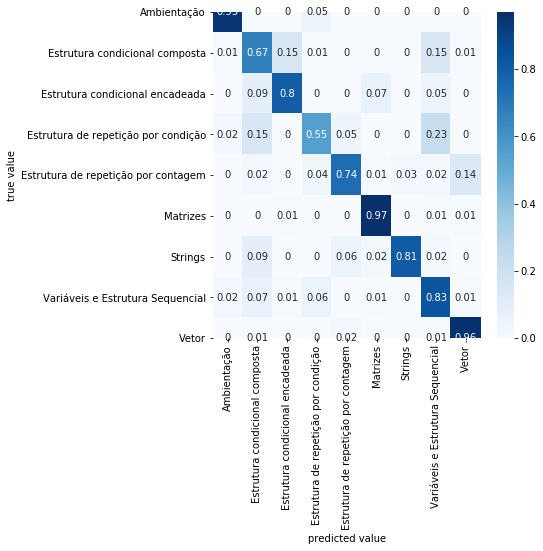

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(pd.DataFrame(norm_conf_mx.round(2),
                         columns=labels, 
                         index=labels), 
            annot=True, 
            fmt='g', 
            cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');